In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import math
import threading
import scipy


from scipy import constants
from scipy import interpolate
from scipy import integrate

In [7]:
from scipy.integrate import odeint,quad,dblquad,simps,quad_vec,nquad
import sympy
from scipy import fftpack

In [8]:
def cft(g, f):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""    
    result = np.zeros(len(f), dtype=complex)
    
    # Loop over all frequencies and calculate integral value
    for i, ff in enumerate(f):
        # Evaluate the Fourier Integral for a single frequency ff, 
        # assuming the function is time-limited to abs(t)<5
        result[i] = complex_quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -5, 5)
    return result

In [9]:
def complex_quad(g, a, b):
    """Return definite integral of complex-valued g from a to b, 
    using Simpson's rule"""
    # 2501: Amount of used samples for the trapezoidal rule
    t = np.linspace(a, b, 2501)  
    x = g(t)
    return integrate.simps(y=x, x=t)

(-2.0, 2.0)

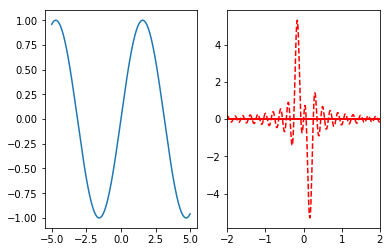

In [10]:
def rect(t):
    return (np.sin(t)).astype(float)

t = np.linspace(-5,5, 1000)

plt.subplot(121)
plt.plot(t, rect(t))

f = np.linspace(-5, 5, 1000)
R = cft(rect, f)  # Calculate the numeric Fourier Transform of the rect function

plt.subplot(122)
plt.plot(f, R.real, 'r-', lw=2, label='Numeric real')
plt.plot(f, R.imag, 'r--', label='Numeric imag')
plt.xlim(-2.,2.)

In [33]:
# N = int(4/1)
# # dx = 0.000625

# x = np.linspace(-N/2,N/2-1,N)
# y = x.T

# xx , yy = np.meshgrid(x,y)

# print(x)
# print(xx)

[-2. -1.  0.  1.]
[[-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]
 [-2. -1.  0.  1.]]


In [39]:
# f = np.linspace(-5,5,N)

# result = np.zeros((len(f),len(f)),dtype=complex)

In [111]:
N = int(200/1)

t1= np.linspace(-2,2,N)
t2 = t1.T

x = np.zeros((N,N),dtype = complex)

x,y = np.meshgrid(t1,t2) 

def DFT_Matrix(M):
    i, j = np.meshgrid(np.arange(M), np.arange(M))
    omega = np.exp( - 2 * np.pi * 1J / M )
    W = np.power( omega, i * j ) / np.sqrt(M)
    return W


def rect(x):
    return ((abs(x) < .1).astype(float))

W=DFT_Matrix(N)
x_of_dft = W.dot(rect(x)).dot(W)

In [114]:
i,j = np.meshgrid(np.arange(N), np.arange(N))
print(j)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [197 197 197 ... 197 197 197]
 [198 198 198 ... 198 198 198]
 [199 199 199 ... 199 199 199]]


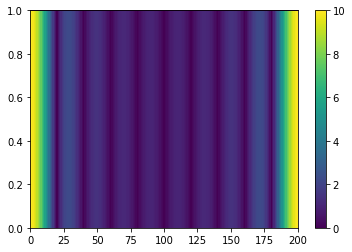

In [98]:
fig = plt.figure()
plt.pcolor(np.abs(x_of_dft))
plt.ylim(0,1)
plt.colorbar()

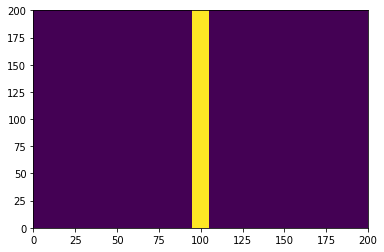

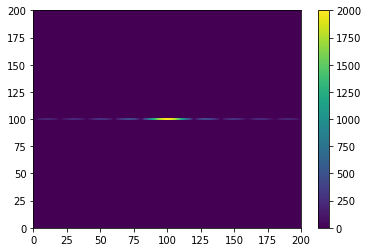

In [101]:
fig = plt.figure()
plt.pcolor(rect(x))
plt.colorbar

x_fft = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(rect(x))))
# x_fft = np.fft.fft2(rect(x))

fig = plt.figure()
plt.pcolor(np.abs(x_fft))
# plt.ylim(0,1)
plt.colorbar()

In [108]:


A = np.array([[1,2],[2,1]])
B = np.array([[1,3],[3,1]])

AB = A.dot(B).dot(A)
print(AB)
print(np.dot(A,B).dot(A))

[[17 19]
 [19 17]]
[[17 19]
 [19 17]]
